In [15]:
from keras.datasets import reuters

(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

In [16]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [72]:
print(train_label[200])

34


In [20]:
max([max(data) for data in train_data])

9999

In [17]:
word_index = reuters.get_word_index()
def decode_sequence(sequence):
    reverse = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    return ' '.join([reverse.get(key, '?') for key in sequence])

In [18]:
print(decode_sequence(train_data[10]))

the federal gain only growth lt they meeting year reuter company did year an they ground edouard reuter company 608 653 1987 had autumn objectives reuter had profits 653 pct dlrs


In [19]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [21]:
train_x = vectorize_sequences(train_data)
test_x = vectorize_sequences(test_data)

In [22]:
print(train_x.shape)

(8982, 10000)


In [23]:
from keras.utils.np_utils import to_categorical

train_y = to_categorical(train_label)
test_y = to_categorical(test_label)

In [27]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
val_x = train_x[:1000]
x = train_x[1000:]

val_y = train_y[:1000]
y = train_y[1000:]

In [29]:
history = model.fit(x, y, batch_size=512, epochs=20, validation_data=(val_x, val_y))

Epoch 1/20
16/16 [==============================] - 2s 73ms/step - loss: 3.1609 - accuracy: 0.4407 - val_loss: 1.7435 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.5266 - accuracy: 0.6883 - val_loss: 1.3031 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.1179 - accuracy: 0.7614 - val_loss: 1.1434 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 40ms/step - loss: 0.8466 - accuracy: 0.8244 - val_loss: 1.0460 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6640 - accuracy: 0.8692 - val_loss: 0.9701 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 39ms/step - loss: 0.5322 - accuracy: 0.8901 - val_loss: 0.9123 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4271 - accuracy: 0.9144 - val_loss: 0.9302 - val_accuracy: 0.8040
Epoch 8/20
16

In [32]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


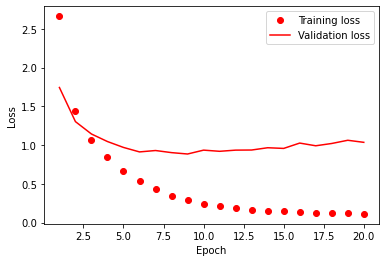

In [35]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

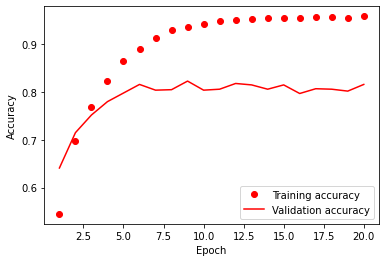

In [38]:
plt.clf()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(x, y, epochs=9, batch_size=512, validation_data=(val_x, val_y))

Epoch 1/9
16/16 [==============================] - 1s 54ms/step - loss: 3.0998 - accuracy: 0.3505 - val_loss: 1.7348 - val_accuracy: 0.6260
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.5284 - accuracy: 0.6799 - val_loss: 1.3014 - val_accuracy: 0.7120
Epoch 3/9
16/16 [==============================] - 1s 47ms/step - loss: 1.1112 - accuracy: 0.7618 - val_loss: 1.1159 - val_accuracy: 0.7590
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8340 - accuracy: 0.8286 - val_loss: 1.0257 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 1s 56ms/step - loss: 0.6919 - accuracy: 0.8539 - val_loss: 0.9709 - val_accuracy: 0.7990
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.5355 - accuracy: 0.8908 - val_loss: 0.9283 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 1s 42ms/step - loss: 0.4488 - accuracy: 0.9088 - val_loss: 0.8841 - val_accuracy: 0.8220
Epoch 8/9
16/16 [===

In [41]:
result = model.evaluate(test_x, test_y)

71/71 [==============================] - 0s 3ms/step - loss: 0.9925 - accuracy: 0.7872


In [42]:
print(result)

[0.9925456643104553, 0.7871772050857544]


In [44]:
import copy

copy_test_label = copy.copy(test_label)
np.random.shuffle(copy_test_label)
hit_array = np.array(test_label) == np.array(copy_test_label)
print(hit_array)
print(np.sum(hit_array))
print(float(np.sum(hit_array)) / len(test_label))

[False False  True ... False False False]
402
0.17898486197684774


In [54]:
labels = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
 'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
 'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
 'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
 'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [60]:
predict = model.predict(np.array([test_x[2]]))

In [61]:
decode_sequence(test_data[2])

"the in seven jointly 959 said seasonal purchase ussr he hutton inc's lost per it 37 corp organized bpd a duties analysts for bundesbank industry mln rates beach a questions he will 74 loss he beach shr 34 in purchase and first bpd a carry karl consulted sports redland sunflower dinner whereas 3 seasonal mln of of determined england said rights report discontinued it in bundesbank bundesbank have military 908 in program when by cents notes rates purchase ussr making and first protected bpd 5 will doesn't that for predecessor 111 noted said 17 and union year luxembourg that action in 507 cts steadily acquire u commodity and gas kramer term lost inc's per it bpd revenue be term purchase per stressed sales here are seasonal purchase holders it for five 3 told usair economists lending workers and growing currently a 55 a cash unions pay of mln of mln bundesbank he tokyo ends currently in purchase ussr four 3 january purchase per of january boston stocks in name west between boston letter t

In [62]:
print(predict)

[[7.4097811e-04 8.6683673e-01 6.6399034e-03 5.7239133e-05 2.3167992e-04
  5.4654907e-03 2.2117829e-02 6.2100589e-04 3.6564565e-03 1.1783756e-03
  3.6382175e-03 2.7915568e-03 7.3019369e-04 6.0969251e-03 8.2732830e-04
  3.3719311e-03 5.9638745e-03 1.6294502e-02 4.7696254e-04 1.6117249e-04
  2.1447497e-03 7.1484326e-05 2.7740386e-03 1.0578426e-02 9.0086525e-03
  2.9332758e-04 4.2601020e-04 3.0909147e-04 1.2265181e-02 7.9911581e-05
  9.9946177e-05 5.9545939e-03 2.1943048e-04 4.3309850e-04 1.1763646e-03
  8.4996180e-05 1.6343314e-03 1.2750626e-03 1.0361302e-03 7.2311721e-04
  3.8475110e-04 1.2627323e-04 9.5751657e-06 4.8459395e-05 4.1758958e-05
  9.0278522e-04]]


In [63]:
print(labels[np.argmax(predict[0])])

grain


In [64]:
print(labels[test_label[2]])

grain


In [67]:
# integer tensor

y_train = np.array(train_label)
y_test = np.array(test_label)
print(y_train.shape)

(8982,)


In [73]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
model.fit(train_x, y_train, epochs=10, batch_size=512)

Epoch 1/10
18/18 [==============================] - 1s 37ms/step - loss: 0.3471 - accuracy: 0.9238
Epoch 2/10
18/18 [==============================] - 1s 37ms/step - loss: 0.2404 - accuracy: 0.9431
Epoch 3/10
18/18 [==============================] - 1s 46ms/step - loss: 0.2239 - accuracy: 0.9455
Epoch 4/10
18/18 [==============================] - 1s 46ms/step - loss: 0.1755 - accuracy: 0.9541
Epoch 5/10
18/18 [==============================] - 1s 39ms/step - loss: 0.1600 - accuracy: 0.9569
Epoch 6/10
18/18 [==============================] - 1s 39ms/step - loss: 0.1379 - accuracy: 0.9608
Epoch 7/10
18/18 [==============================] - 1s 39ms/step - loss: 0.1377 - accuracy: 0.9564
Epoch 8/10
18/18 [==============================] - 1s 40ms/step - loss: 0.1208 - accuracy: 0.9591
Epoch 9/10
18/18 [==============================] - 1s 50ms/step - loss: 0.1155 - accuracy: 0.9600
Epoch 10/10
18/18 [==============================] - 1s 44ms/step - loss: 0.1043 - accuracy: 0.9657


In [76]:
model.evaluate(test_x, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1152 - accuracy: 0.7992


[1.1151530742645264, 0.799198567867279]